<a href="https://colab.research.google.com/github/kabirodavies/ML_classification/blob/main/climate_change_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How do machines understand language?

© Explore Data Science Academy

In [2]:
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
from textblob import TextBlob
from wordcloud import WordCloud
# set plot style
sns.set()

import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

## Train Data

In [3]:
url = 'https://raw.githubusercontent.com/kabirodavies/ML_classification/main/train.csv'
df = pd.read_csv(url)
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


##Test Data

In [4]:
url = 'https://raw.githubusercontent.com/kabirodavies/ML_classification/main/test.csv'
df_test = pd.read_csv(url)
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## Text Preprocessing, Cleaning of Raw Data

In [5]:
#Convert Text to lowercase characters
def to_lower(word):
  word = word.lower()

  return word

In [6]:
df["message"] = df["message"].apply(to_lower)

df_test["message"] = df_test["message"].apply(to_lower)


In [7]:
def remove_hyperlink(word):       
    return re.sub(r"http\S+", "", word)

In [8]:
df["message"] = df["message"].apply(remove_hyperlink)

df_test["message"] = df_test["message"].apply(remove_hyperlink)

In [9]:
#Data Cleaning with RegEx
def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
  text = re.sub(r'#', '', text) # Remove '#' symbol
  text = re.sub(r':', '', text) # Remove ':' symbol
  text = re.sub(r'rt[\s]+', '', text) #Remove RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlink
  text = re.sub(r'\w*\d\w*', '', text) # Remove numbers
  return text

In [10]:
df["message"] = df["message"].apply(clean_text)

df_test["message"] = df_test["message"].apply(clean_text)

##Tokenisation

In [11]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer, TreebankWordTokenizer
from collections import Counter


In [12]:
#Tokenize with TweetTokenizer
tokeniser = TreebankWordTokenizer()

df['message'] = df['message'].apply(tokeniser.tokenize)

df_test['message'] = df_test['message'].apply(tokeniser.tokenize)

In [13]:
#Filter words only
df['message'] = df['message'].apply(lambda x: [w for w in x if w.isalpha()])

df_test['message'] = df_test['message'].apply(lambda x: [w for w in x if w.isalpha()])

In [14]:
df.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, does, think, carbon...",625221
1,1,"[it, not, like, we, lack, evidence, of, anthro...",126103
2,2,"[researchers, say, we, have, three, years, to,...",698562
3,1,"[todayinmaker, wired, was, a, pivotal, year, i...",573736
4,1,"[it, and, a, racist, sexist, climate, change, ...",466954


In [15]:
df_test.head()

,message,tweetid
0,"[europe, will, now, be, looking, to, china, to...",169760
1,"[combine, this, with, the, polling, of, staffe...",35326
2,"[the, scary, unimpeachable, evidence, that, cl...",224985
3,"[putin, got, to, you, too, jill, trump, does, ...",476263
4,"[orgasms, cause, global, warming, republican]",872928


## Stemming

In [16]:
# from nltk import SnowballStemmer, LancasterStemmer
# from nltk.stem.porter import PorterStemmer


In [17]:
# stemmer = PorterStemmer()
# def stem_words(text):       
#     return " ".join([stemmer.stem(word) for word in text])

In [18]:
# dfa['message'] = dfa['message'].apply(lambda text: stem_words(text))

In [19]:
# #Function 1 SnowballStemmer
# stemmer = SnowballStemmer('english')
# def mbti_stemmer(words, stemmer):
#     return [stemmer.stem(word) for word in words]

# df['message'] = df['message'].apply(mbti_stemmer, args=(stemmer, ))

In [20]:
#Function 2: PorterStemmer
# stemmer = PorterStemmer()
# def stem_words(text):       
#     return " ".join([stemmer.stem(word) for word in text])

# df['message'] = df['message'].apply(lambda text: stem_words(text))


In [21]:
# #Stemming Preview
# words = 'caring cares cared caringly carefully climate change researchers looking unimpeachable '

# # find the stem of each word in words
# for word in words.split():
#     print(stemmer.stem(word))

##Removal of stopwords

In [22]:
from nltk.corpus import stopwords
nltk.download(['punkt','stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [24]:
df['message'] = df['message'].apply(remove_stop_words)

df_test['message'] = df_test['message'].apply(remove_stop_words)

In [25]:
df.head(10)

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, think, carbon, diox...",625221
1,1,"[like, lack, evidence, anthropogenic, global, ...",126103
2,2,"[researchers, say, three, years, act, climate,...",698562
3,1,"[todayinmaker, wired, pivotal, year, war, clim...",573736
4,1,"[racist, sexist, climate, change, denying, big...",466954
5,1,"[worth, read, whether, believe, climate, change]",425577
6,1,"[mike, pence, believe, global, warming, smokin...",294933
7,1,"[six, big, things, today, fight, climate, chan...",992717
8,1,"[nephew, wants, die, old, age, like, perish, f...",664510
9,1,[global],260471


In [26]:
df_test.head(10)

,message,tweetid
0,"[europe, looking, china, make, sure, alone, fi...",169760
1,"[combine, polling, staffers, climate, change, ...",35326
2,"[scary, unimpeachable, evidence, climate, chan...",224985
3,"[putin, got, jill, trump, believe, climate, ch...",476263
4,"[orgasms, cause, global, warming, republican]",872928
5,"[trump, muzzles, employees, several, gov, agen...",75639
6,"[yes, wrote, yr, comp, sci, ethics, told, clim...",211536
7,"[indonesian, farmers, weather, climate, change...",569434
8,"[british, scientists, face, huge, hit, us, cut...",315368
9,"[aid, agriculture, sustainable, agriculture, c...",591733


### Lemmatization

In [27]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [28]:
#Lematize and Join
def mbti_lemma(words, lemmatizer):       
    return " ".join([lemmatizer.lemmatize(word) for word in words])

In [29]:
df['message'] = df['message'].apply(mbti_lemma, args=(lemmatizer, ))

df_test['message'] = df_test['message'].apply(mbti_lemma, args=(lemmatizer, ))

In [30]:
#Method II Lemmatization
# def mbti_lemma(words, lemmatizer):
#     return [lemmatizer.lemmatize(word) for word in words]  

In [31]:
# df['message'] = df['message'].apply(mbti_lemma, args=(lemmatizer, ))

# df_test['message'] = df['message'].apply(mbti_lemma, args=(lemmatizer, ))

In [32]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief think carbon dioxide ma...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,researcher say three year act climate change late,698562
3,1,todayinmaker wired pivotal year war climate ch...,573736
4,1,racist sexist climate change denying bigot lea...,466954


In [33]:
df_test.head()

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffer climate change woman r...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump believe climate change th...,476263
4,orgasm cause global warming republican,872928


##Visuals

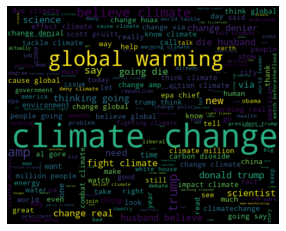

In [34]:
#Visualise Word Cloud Training Data
allwords = ' '.join( [twts for twts in df['message']] )
wordCloud = WordCloud(width = 500, height = 400, random_state = 21, max_font_size = 125).generate(allwords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

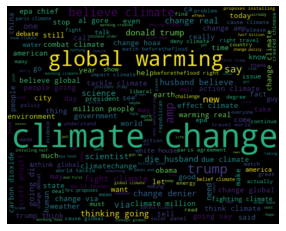

In [35]:
#Visualise Word Cloud Test Data
allwords = ' '.join( [twts for twts in df_test['message']] )
wordCloud = WordCloud(width = 500, height = 400, random_state = 21, max_font_size = 125).generate(allwords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##Bag of Words

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bow = CountVectorizer( min_df=2,max_features=100000)
bow.fit(df['message'])
X = tweets_processed =bow.transform(df['message']).toarray()
y = df["sentiment"]


print(np.shape(X))
print(np.shape(y))

(15819, 6208)
(15819,)


##Model Fitting

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", random_state=41)

# from sklearn.naive_bayes import GaussianNB
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
#Predict Y
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
print(accuracy_score(y_test, y_pred))
# print(f1_score(y_test, y_pred))
# print(precision_score(y_test, y_pred))

0.6134639696586599


##LogisticRegression

In [44]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

# # training the model
# model.fit(X_train,y_train)

In [45]:
# model.intercept_[0]

In [46]:
# #Predict Y
# y_pred = model.predict(X_test)

In [47]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score
# print(accuracy_score(y_test, y_pred))
# # print(f1_score(y_test, y_pred))
# # print(precision_score(y_test, y_pred))

##Test the Test Data

In [48]:
CV = CountVectorizer( min_df=2,max_features=100000)
bow.fit(df['message'])
X = tweets_processed =bow.transform(df['message']).toarray()
y = df["sentiment"]
test_df = tweets_processed =bow.transform(df_test['message']).toarray()


print(np.shape(X))
print(np.shape(y))
print(np.shape(X_test))

(15819, 6208)
(15819,)
(3164, 6208)


In [49]:
#Predict X_test
final_pred = model.predict(test_df)

In [50]:
final_pred.shape

(10546,)

In [51]:
final_pred.dtype

dtype('int64')

In [52]:
final_pred[:20]

array([2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

##Submission

In [53]:
url = 'https://raw.githubusercontent.com/kabirodavies/ML_classification/main/sample_submission.csv'
sub = pd.read_csv(url)

In [54]:
sub.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [55]:
df_test.head()

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffer climate change woman r...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump believe climate change th...,476263
4,orgasm cause global warming republican,872928


In [56]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['tweetid'] = df_test['tweetid']
submission['sentiment'] = final_pred # our model predictions on the test dataset
submission.head()

,tweetid,sentiment
0,169760,2
1,35326,1
2,224985,1
3,476263,0
4,872928,0


In [57]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweetid    10546 non-null  int64
 1   sentiment  10546 non-null  int64
dtypes: int64(2)
memory usage: 164.9 KB


In [58]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   tweetid    10546 non-null  int64
 1   sentiment  10546 non-null  int64
dtypes: int64(2)
memory usage: 164.9 KB


In [62]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['sentiment'] = submission['sentiment'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [63]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test_df):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (10546 rows).


In [64]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('climate_change_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [65]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("climate_change_submission.csv")
submissions_check.head()

,tweetid,sentiment
0,169760,2
1,35326,1
2,224985,1
3,476263,0
4,872928,0


In [66]:
from google.colab import files
files.download("climate_change_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Saving a model with Pickle

In [67]:
#Save Model With Pickle
import pickle

model_save_path = "dtc_model.pkl" #DecisionTreeClassifier
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

In [68]:
#Open Model With Pickle
model_load_path = "dtc_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

In [70]:
# get predictions from unpickled model
p_y_pred = unpickled_model.predict(X_test)

In [71]:
# calculate performance metrics
print(accuracy_score(y_test, p_y_pred))


0.6134639696586599


In [72]:
from google.colab import files
files.download("dtc_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>